In [16]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt

In [50]:
import glob

for filename in glob.glob('images/train/suma/*.png'):
    from PIL import Image
    img = Image.open(filename).convert('L')
    img.save(filename)

In [51]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("images/train/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("images/valid/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')


Found 39 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [52]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))



model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


model.fit_generator(train_dataset,
         steps_per_epoch =1,
         epochs = 20,
         validation_data = test_dataset

         )

C:\Users\Asus\AppData\Local\Temp\ipykernel_18852\1700071334.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataset,


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6934 - accuracy: 0.4688 - val_loss: 0.7676 - val_accuracy: 0.5200
Epoch 2/20
1/1 [==============================] - 0s 438ms/step - loss: 0.7928 - accuracy: 0.4286 - val_loss: 0.6930 - val_accuracy: 0.4800
Epoch 3/20
1/1 [==============================] - 0s 469ms/step - loss: 0.6861 - accuracy: 0.7143 - val_loss: 0.6948 - val_accuracy: 0.4800
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.7031 - accuracy: 0.5312 - val_loss: 0.6959 - val_accuracy: 0.4800
Epoch 5/20
1/1 [==============================] - 1s 999ms/step - loss: 0.7030 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.4800
Epoch 6/20
1/1 [==============================] - 0s 437ms/step - loss: 0.6659 - accuracy: 0.8571 - val_loss: 0.6986 - val_accuracy: 0.4800

1/1 [==============================] - 0s 31ms/step
[[3.2404014e-07]]


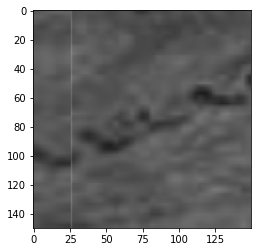

1/1 [==============================] - 0s 35ms/step
[[1.1115845e-09]]


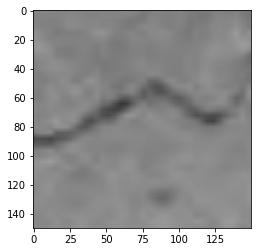

1/1 [==============================] - 0s 27ms/step
[[1.6084768e-07]]


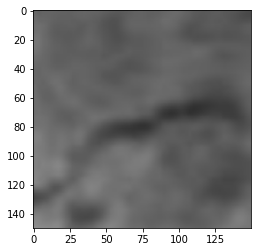

1/1 [==============================] - 0s 31ms/step
[[2.8617444e-08]]


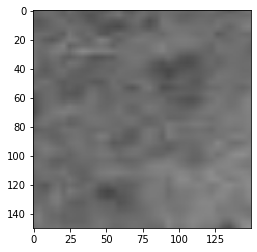

1/1 [==============================] - 0s 95ms/step
[[3.4967238e-09]]


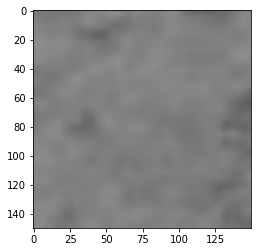

1/1 [==============================] - 0s 40ms/step
[[3.7838754e-09]]


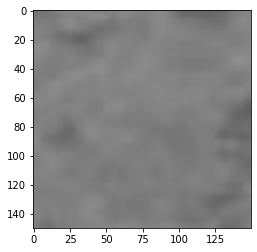

In [57]:
from keras_preprocessing import image


def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))

    plt.imshow(img1)

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:

        plt.title("Trench",fontsize=30)


    elif val == 0:

        plt.title("Forest",fontsize=30)
    plt.show()

predictImage('images/valid/rov/Screenshot 2022-05-24 at 18.57.28.png')
predictImage('images/valid/rov/Screenshot 2022-05-24 at 18.57.37.png')
predictImage('images/valid/rov/Screenshot 2022-05-24 at 19.36.10.png')
predictImage('images/valid/suma/Screenshot 2022-05-24 at 18.57.53.png')
predictImage('images/valid/suma/Screenshot 2022-05-24 at 19.37.12.png')
predictImage('images/valid/suma/Screenshot 2022-05-24 at 19.37.14.png')